In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = pd.DataFrame(dataset.iloc[:,22:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  ...   1   1   1  120   0   0   
44094   2   4   1   1   0   1   1  43   1   1  ...   0   1   1   70   1   1   

       18  19  20  21  
0       2   2   3   1  
1  

In [2]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

In [4]:
svm_model = SVC(kernel='rbf', C=10, gamma='scale',probability=True)
svm_model.fit(X_train, Y_train)


c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, probability=True)

In [5]:
res = svm_model.predict(X_test)
print(res)
print(Y_test)

[2 2 2 ... 2 1 2]
       0
1796   2
40707  2
39197  2
39587  2
24730  2
...   ..
33245  2
42357  2
636    2
25491  0
9821   2

[8819 rows x 1 columns]


In [6]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.9176777412405035


              precision    recall  f1-score   support

           0   0.762868  0.785985  0.774254      1584
           1   0.795290  0.772887  0.783929      1704
           2   1.000000  1.000000  1.000000      5531

    accuracy                       0.917678      8819
   macro avg   0.852719  0.852957  0.852727      8819
weighted avg   0.917854  0.917678  0.917704      8819



[2 2 2 ... 2 1 2]
       0
1796   2
40707  2
39197  2
39587  2
24730  2
...   ..
33245  2
42357  2
636    2
25491  0
9821   2

[8819 rows x 1 columns]


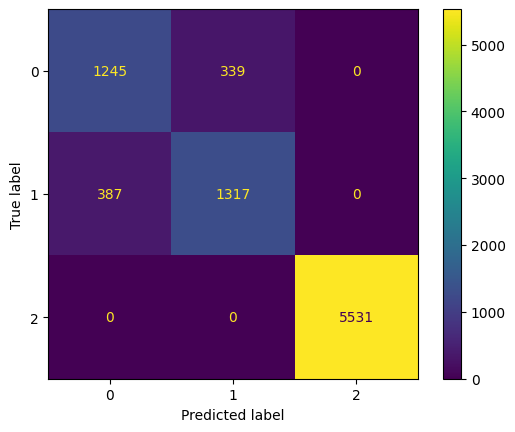

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

res = np.array(res)
print(res)
print(Y_test)
cm = confusion_matrix(Y_test, res)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [8]:
svm_model.predict_proba(X_test)

array([[3.55534869e-14, 3.28092179e-14, 1.00000000e+00],
       [3.07232289e-14, 3.25579572e-14, 1.00000000e+00],
       [3.24121475e-14, 3.29522863e-14, 1.00000000e+00],
       ...,
       [2.85462574e-14, 3.17159748e-14, 1.00000000e+00],
       [2.24411810e-01, 7.75511576e-01, 7.66138476e-05],
       [7.08463780e-07, 8.22877895e-07, 9.99998469e-01]])

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 101it [2:03:15, 73.95s/it]                          


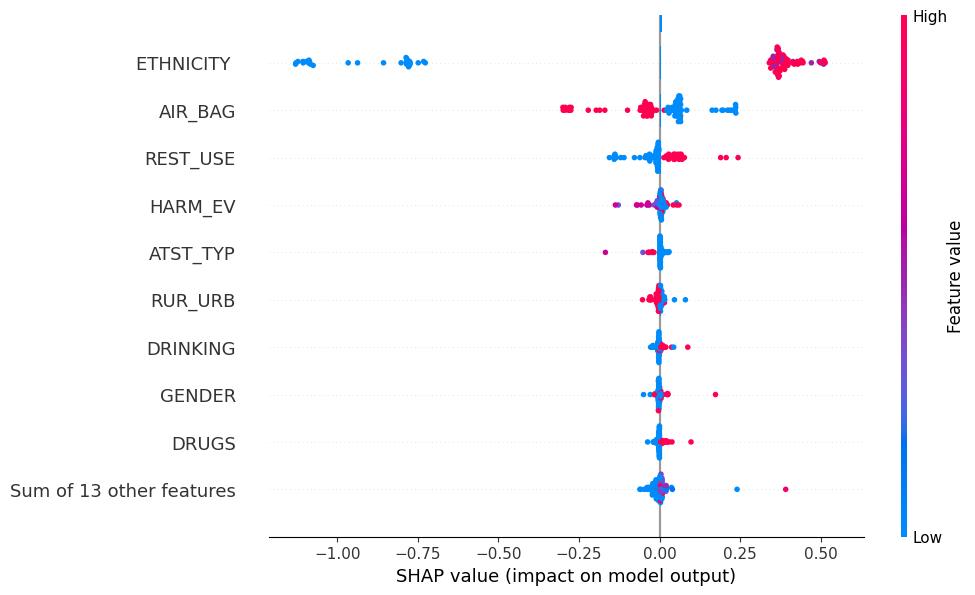

In [9]:
import shap
X_test_shap = shap.sample(X_train,nsamples = 100)
explainer = shap.Explainer(svm_model.predict, X_test_shap)
shap_values = explainer(X_test_shap)
shap.summary_plot(shap_values,X_test_shap,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)

explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)

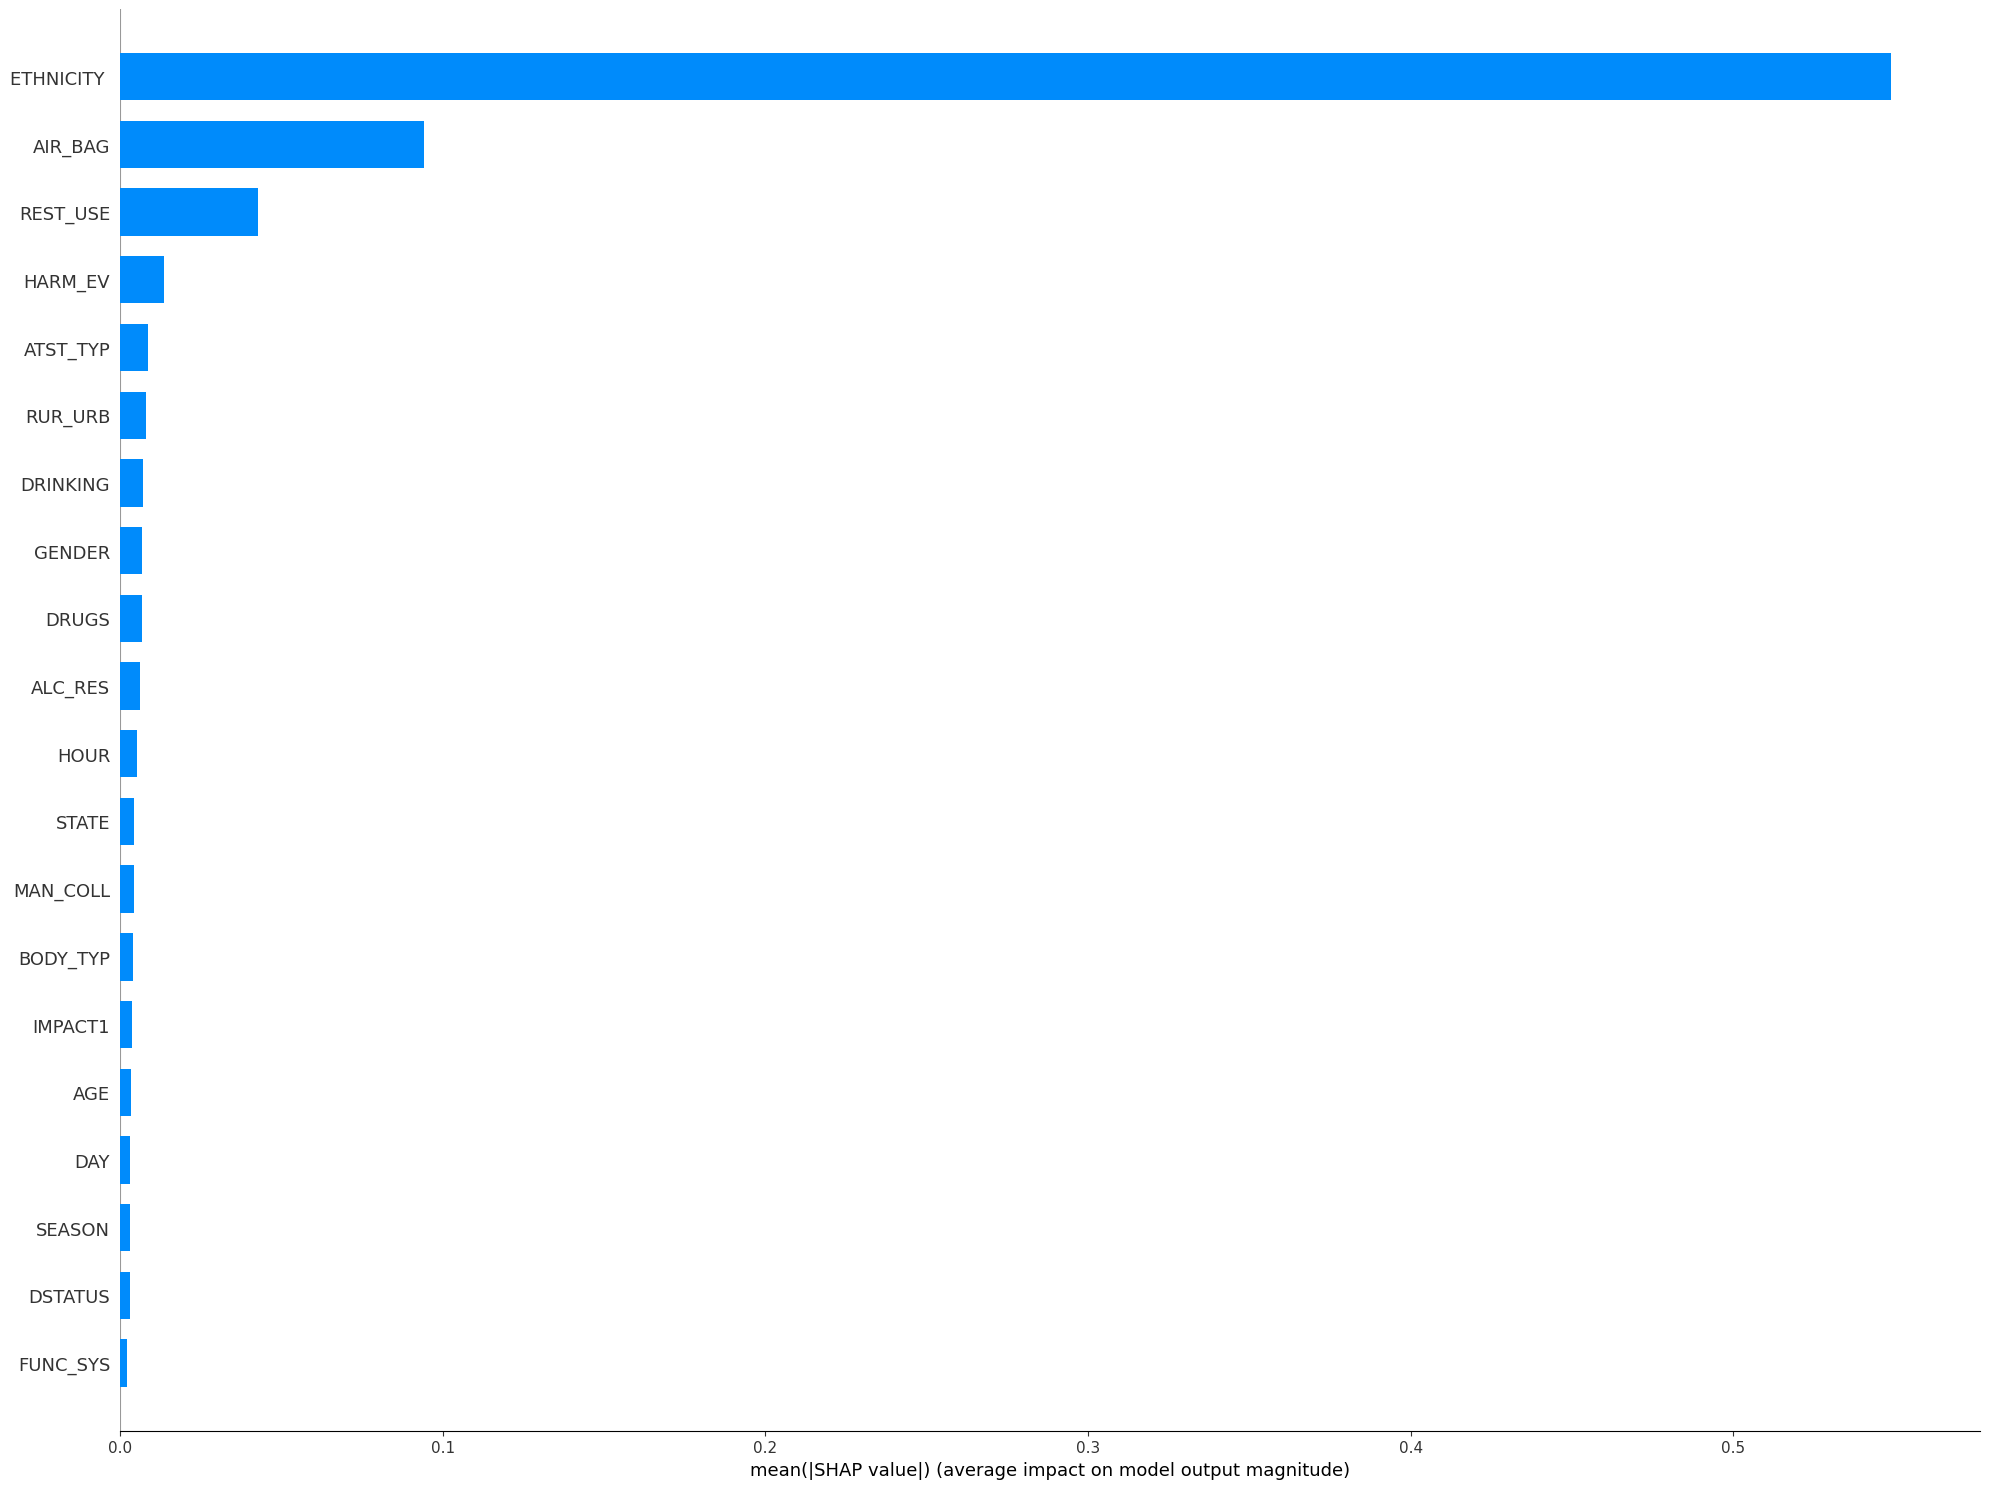

In [10]:
shap.summary_plot(shap_values,X_test_shap,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)